<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/Breast_Cancer_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install tensorflow -U

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [28]:
import tensorflow as tf
import numpy as np


In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import   train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
dataset = load_breast_cancer()

In [31]:
type(dataset)

sklearn.utils.Bunch

In [32]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [33]:
dataset.data.shape

(569, 30)

In [34]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [35]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [36]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [37]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data,dataset.target, test_size=0.33)
N,D = x_train.shape

In [38]:
scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [39]:
ACTIVATION ='sigmoid'
OPTIMIZER = 'adam'
LOSS = 'binary_crossentropy'
METRICS = ['accuracy']


In [40]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation=ACTIVATION)
])
model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)

In [41]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7905 - accuracy: 0.6614 - val_loss: 0.7152 - val_accuracy: 0.7021
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7371 - accuracy: 0.6877 - val_loss: 0.6669 - val_accuracy: 0.7074
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.7165 - val_loss: 0.6231 - val_accuracy: 0.7234
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.7349 - val_loss: 0.5835 - val_accuracy: 0.7553
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.7533 - val_loss: 0.5488 - val_accuracy: 0.7553
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.7769 - val_loss: 0.5173 - val_accuracy: 0.7660
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.7953 - val_loss: 0.4888 - val_accuracy: 0.7766
Epoch 8/100


In [42]:
print(f"Train score: {model.evaluate(x_train,y_train)}")
print(f"Test score {model.evaluate(x_test,y_test)}")

12/12 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.9790
Train score: [0.09509597718715668, 0.9790025949478149]
6/6 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9521
Test score [0.12483234703540802, 0.9521276354789734]


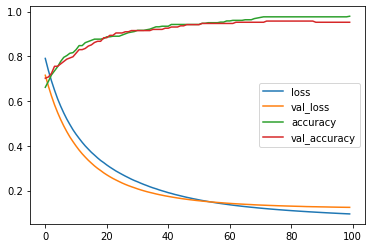

In [43]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [44]:
P = model.predict(x_test)
P  = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [45]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(x_test, y_test))

Manually calculated accuracy: 0.9521276595744681
6/6 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.9521
Evaluate output: [0.12483234703540802, 0.9521276354789734]


In [46]:
model.save('cancer.h5')

In [47]:
model = tf.keras.models.load_model('cancer.h5')

In [48]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9521


[0.12483234703540802, 0.9521276354789734]